<a href="https://colab.research.google.com/github/CarlosSotero/Desafio4---DNC/blob/main/RID190052_Desafio04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importando o dataset para o Colab
from google.colab import files
upload = files.upload()

Saving MKT.csv to MKT (1).csv


#Etapa 01) Análise Descritiva

In [ ]:
# Importando as bibliotecas
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
# Atribuindo o dataset
df = pd.read_csv('MKT.csv')

In [ ]:
# Verificando as 5 primeiras linhas do dataset
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# Verificando os tipos das colunas e se existe algum valor nulo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
# Estatísticas descritivas do dataset
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


#Etapa 02) Análise Exploratória

In [ ]:
# Soma total de investimento por cada mídia
soma_youtube = df['youtube'].sum()
print(f'Valor total investido no Youtube: R${soma_youtube}')
soma_facebook = df['facebook'].sum()
print(f'Valor total investido no Facebook: R${soma_facebook}')
soma_newspaper = df['newspaper'].sum()
print(f'Valor total investido em Newspaper: R${soma_newspaper}')

Valor total investido no Youtube: R$30441.6
Valor total investido no Facebook: R$4731.84
Valor total investido em Newspaper: R$6026.04


In [ ]:
# Criando um dicionário para ser utilizado dentro de um dataframe
dados = {
    'Plataforma': ['YouTube', 'Facebook', 'Newspaper'],
    'Investimento': [soma_youtube, soma_facebook, soma_newspaper]
}

# Criando o DataFrame que conterá o dicionário
df_investimentos = pd.DataFrame(dados)

# Criando um gráfico de barras
fig = px.bar(
    df_investimentos,
    x='Plataforma',
    y='Investimento',
    text='Investimento',
    title='Investimentos por Plataforma',
    labels={'Investimento': 'Total Investido (R$)'}
)

# Personalizar o layout
fig.update_traces(textposition='outside')
fig.update_layout(template='plotly_white')

# Mostrar o gráfico
fig.show()


**Grande investimentos foram feitos através do Youtube, posteriormente em Newspaper e por último no Facebook.**

In [ ]:
# Cria um gráfico de caixa (boxplot) usando o Plotly Express,
# visualizando a distribuição dos dados pela coluna 'youtube'
px.box(df, x='youtube')

In [ ]:
# Visualizando a distribuição dos dados pela coluna 'facebook'
px.box(df, x='facebook')

In [ ]:
# Visualizando a distribuição dos dados pela coluna 'newspaper'
px.box(df, x='newspaper')


**Avaliado que na coluna 'newspaper' existem muitos valores outliers.**

In [ ]:
# Correlação entre as colunas
df.corr()

,youtube,facebook,newspaper,sales
youtube,1.000000,0.086538,0.110759,0.782030
facebook,0.086538,1.000000,0.293425,0.602918
newspaper,0.110759,0.293425,1.000000,0.254987
sales,0.782030,0.602918,0.254987,1.000000


<Axes: >

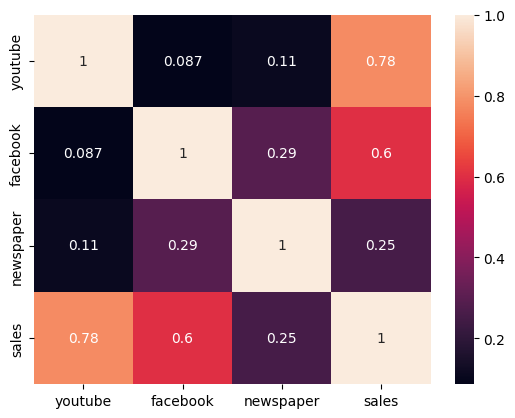

In [ ]:
# Correlação entre as colunas de forma gráfica utilizando a biblioteca seaborn
sns.heatmap(df.corr(), annot=True)

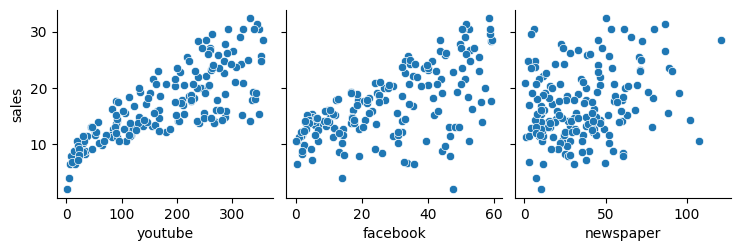

In [ ]:
# Utilizando o gráfico de pairplot para mostrar  as correlações das mídias com 'sales'
sns.pairplot(df, x_vars=['youtube','facebook','newspaper'], y_vars='sales')

**Verificado acima que 'youtube' é o que mais se correlaciona com 'sales', posteriormente 'facebook' e por último 'newspaper'.**

#Etapa 03) Modelagem

##Será utilizado o modelo de regressão linear do sklearn

In [ ]:
X = df[['youtube', 'facebook', 'newspaper']]
y = df['sales']

In [ ]:
# Separando a base de dados entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Utilizando o LinearRegression do sklearn

In [ ]:
# Treinando o modelo na regressão linear
modelLinear = LinearRegression().fit(X_train, y_train)

#Etapa 04) Calculando predição

In [ ]:
# Predizendo os valores do teste
yLinear = modelLinear.predict(X_test)

In [ ]:
# Comparando o resultado do X_test com o y_test utilizando o R2
r2Linear = r2_score(y_test, yLinear)
print(f'O r2_score é: {r2Linear}')

O r2_score é: 0.872863085701216


Buscando melhores hiperparametros para melhorar o modelo

[Documentação da Regressão linear para a verificação dos hiperparametros](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [ ]:
# Verificando os nomes dos hiperparametros do modelo
modelLinear.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'positive'])

In [ ]:
# Ajustando os hiperparametros
parametros = {
    'copy_X': [False, True],
    'fit_intercept': [False, True],
    'n_jobs': [0, 1, 2],
    'positive': [False, True]
}

In [ ]:
# Buscando qual a melhor combinação de hiperparamentros
linearGrid = GridSearchCV(LinearRegression(),parametros, refit='r2', verbose=True)

In [ ]:
# Treinando o novo modelo Grid
linearGrid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': [False, True],
                         'fit_intercept': [False, True], 'n_jobs': [0, 1, 2],
                         'positive': [False, True]},
             refit='r2', verbose=True)

In [ ]:
# Verificando quais foram os melhores hiperparametros
linearGrid.best_params_

{'copy_X': False, 'fit_intercept': True, 'n_jobs': 0, 'positive': True}

In [ ]:
# Predizendos os valores
yGrid = linearGrid.predict(X_test)

In [ ]:
# Verificando o resultado
r2Grid = r2_score(y_test, yGrid)
print(f'O r2_score otimizado com a melhor combinação do Grid é: {r2Grid}')

O r2_score otimizado com a melhor combinação do Grid é: 0.8728894133434414


Text(0, 0.5, 'Sales')

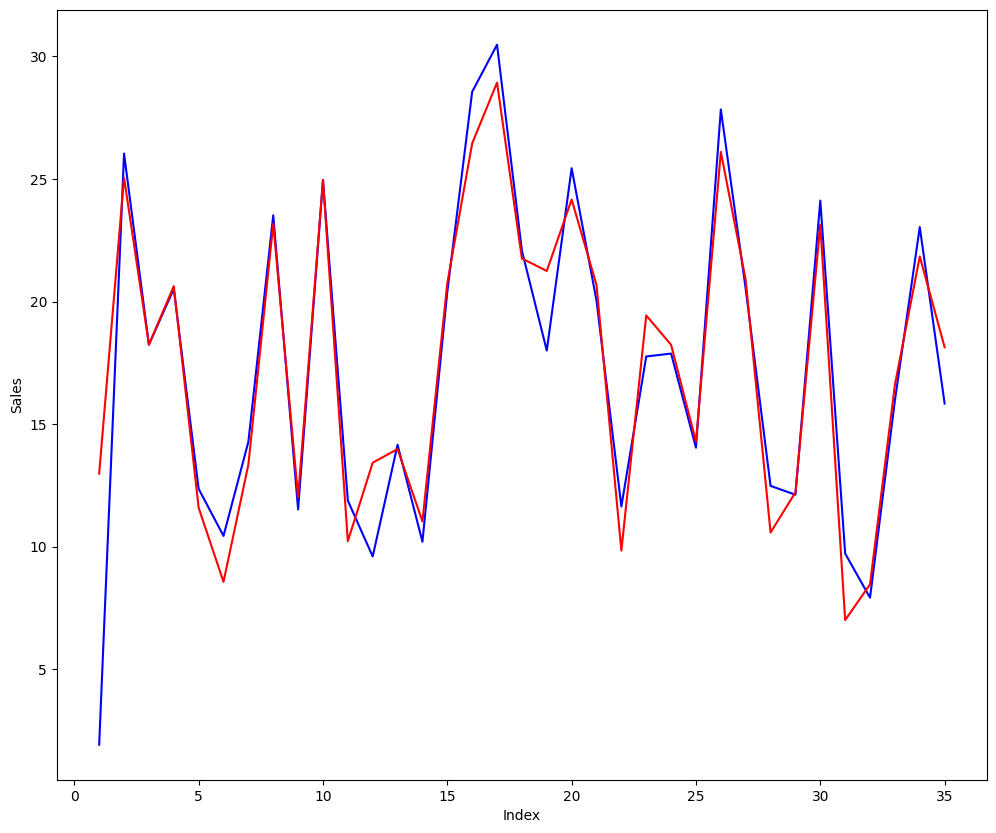

In [ ]:
# Verificando o tamanho da base de dados
y_test.shape

# Para percorrer o tamanho da base de teste
c = [i for i in range(1,36,1)]

# Definindo o tamanho do gráfico
fig = plt.figure(figsize=(12,10))

# Cor azul do gráfico para os valores de teste
plt.plot(c, y_test, color='blue')

# Cor vermelha do gráfico para os valores que foram previstos
plt.plot(c, yGrid, color='red')

plt.xlabel('Index')
plt.ylabel('Sales')

##Premissa

In [ ]:
youtube = float(input('Digite o valor que será investido no Youtube: '))
facebook = float(input('Digite o valor que será investido no Facebook: '))
newspaper = float(input('Digite o valor que será investido em Newspaper: '))
entrada = pd.DataFrame([[youtube, facebook, newspaper]], columns=['youtube','facebook','newspaper'])
print(f'A previsão de vendas com esses valores é de: R${linearGrid.predict(entrada)[0]:.2f}')

Digite o valor que será investido no Youtube: 10
Digite o valor que será investido no Facebook: 40
Digite o valor que será investido em Newspaper: 50
A previsão de vendas com esses valores é de: R$11.92


**Segundo o modelo de regressão linear, o melhor investimento será no Facebook**